# Анализ ЭЭГ

In [1]:
#Загружаем датасет через moabb 
import moabb.datasets
sampling_rate = 512

m_dataset = moabb.datasets.bi2013a(
    NonAdaptive=True,
    Adaptive=True,
    Training=True,
    Online=True,
)
m_dataset.download()
m_data = m_dataset.get_data()

100%|###############################################| 244M/244M [00:00<?, ?B/s]
SHA256 hash of downloaded file: 25538b1956e0ac212a60fefaea9187171de19934637d72025120ddd45f363907
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|###############################################| 136M/136M [00:00<?, ?B/s]
SHA256 hash of downloaded file: e71a1511ad839b7c93aab9f5dc2134a90e6d5a2a4d2546febcc11a6c9c1b856f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|###############################################| 126M/126M [00:00<?, ?B/s]
SHA256 hash of downloaded file: 8e89e180c092fc41ac1896932be3da7ca145157f24dd0e73b462edf9bb861e60
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|################################

Красным отмечены те каналы, которые записаны в датасете
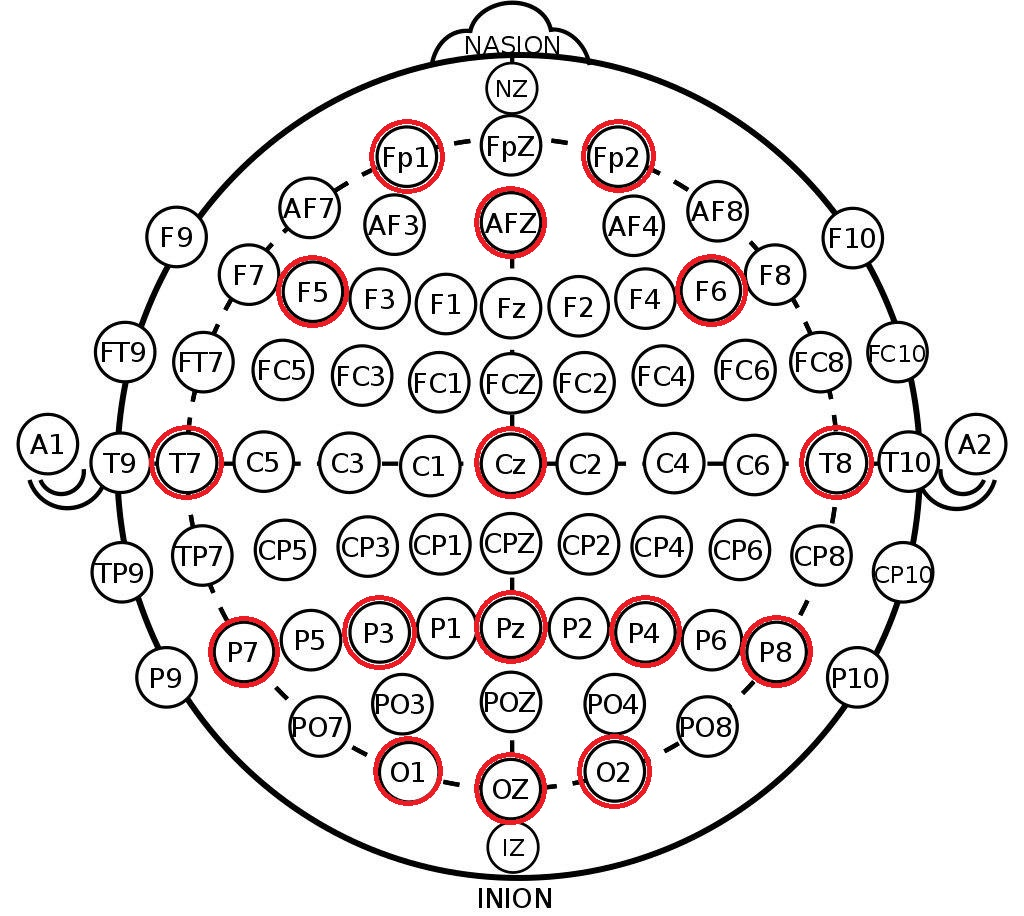

In [2]:
print(m_data[1]['session_1']['run_1'])
channels = m_data[1]['session_1']['run_1'].ch_names[:-1]
print(channels)

NameError: name 'm_data' is not defined

 77%|#############################8         | 102M/133M [00:36<00:09, 3.37MB/s]

In [ ]:
raw_dataset = []
print(m_data.items()[0])

# По моему тут написан бред
# Если мы не собираемся изменять данные, то list не нужен
# Так же с использованием append каждый раз у нас происходит довыделение памяти
# и объект существует во всех своих промежуточных проявлениях. Это тоже не нужно
# так как мы не делаем никаких промежуточных вычислений
#Так же, пока не посмотрим данные нельзя сказать, нужен ли вообще sorted

# raw_dataset = []
# for _, sessions in sorted(m_data.items()):
#     eegs, markers = [], []
#     for item, run in sorted(sessions['session_1'].items()):
#         data = run.get_data()
#         eegs.append(data[:-1])
#         markers.append(data[-1])
#     raw_dataset.append((eegs, markers))

raw_dataset = (
                (   
                #eegs                                       # TODO ПОСМОТРЕТЬ НУЖЕН ЛИ SORTED и ITEMS
                tuple(run.get_data()[:-1] for item, run in sorted(sessions['session_1'].items())),
                #markers                                    # TODO ПОСМОТРЕТЬ НУЖЕН ЛИ SORTED и ITEMS
                tuple(run.get_data()[-1] for item, run in sorted(sessions['session_1'].items())),
                )               # TODO ПОСМОТРЕТЬ НУЖЕН ЛИ SORTED и ITEMS
                for _, sessions in sorted(m_data.items())
              )